<a href="https://colab.research.google.com/github/vigneshshiv28/DAV_60/blob/main/DAV_exp_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Dependencies**

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

**Loading Data and Preprocessing it**

In [88]:
Data = pd.read_csv("/content/sample_data/2019.csv")
Data.head()


,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [89]:
df = pd.DataFrame(Data,columns= ["Score","GDP per capita","Social support","Healthy life expectancy","Freedom to make life choices","Generosity","Perceptions of corruption"])
df.head()

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [90]:
df.describe

<bound method NDFrame.describe of      Score  GDP per capita  Social support  Healthy life expectancy  \
0    7.769           1.340           1.587                    0.986   
1    7.600           1.383           1.573                    0.996   
2    7.554           1.488           1.582                    1.028   
3    7.494           1.380           1.624                    1.026   
4    7.488           1.396           1.522                    0.999   
..     ...             ...             ...                      ...   
151  3.334           0.359           0.711                    0.614   
152  3.231           0.476           0.885                    0.499   
153  3.203           0.350           0.517                    0.361   
154  3.083           0.026           0.000                    0.105   
155  2.853           0.306           0.575                    0.295   

     Freedom to make life choices  Generosity  Perceptions of corruption  
0                           0.596     

In [76]:
df.isnull().sum()

Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

**Pair plotting features to check which feature show linear dependency with Score**

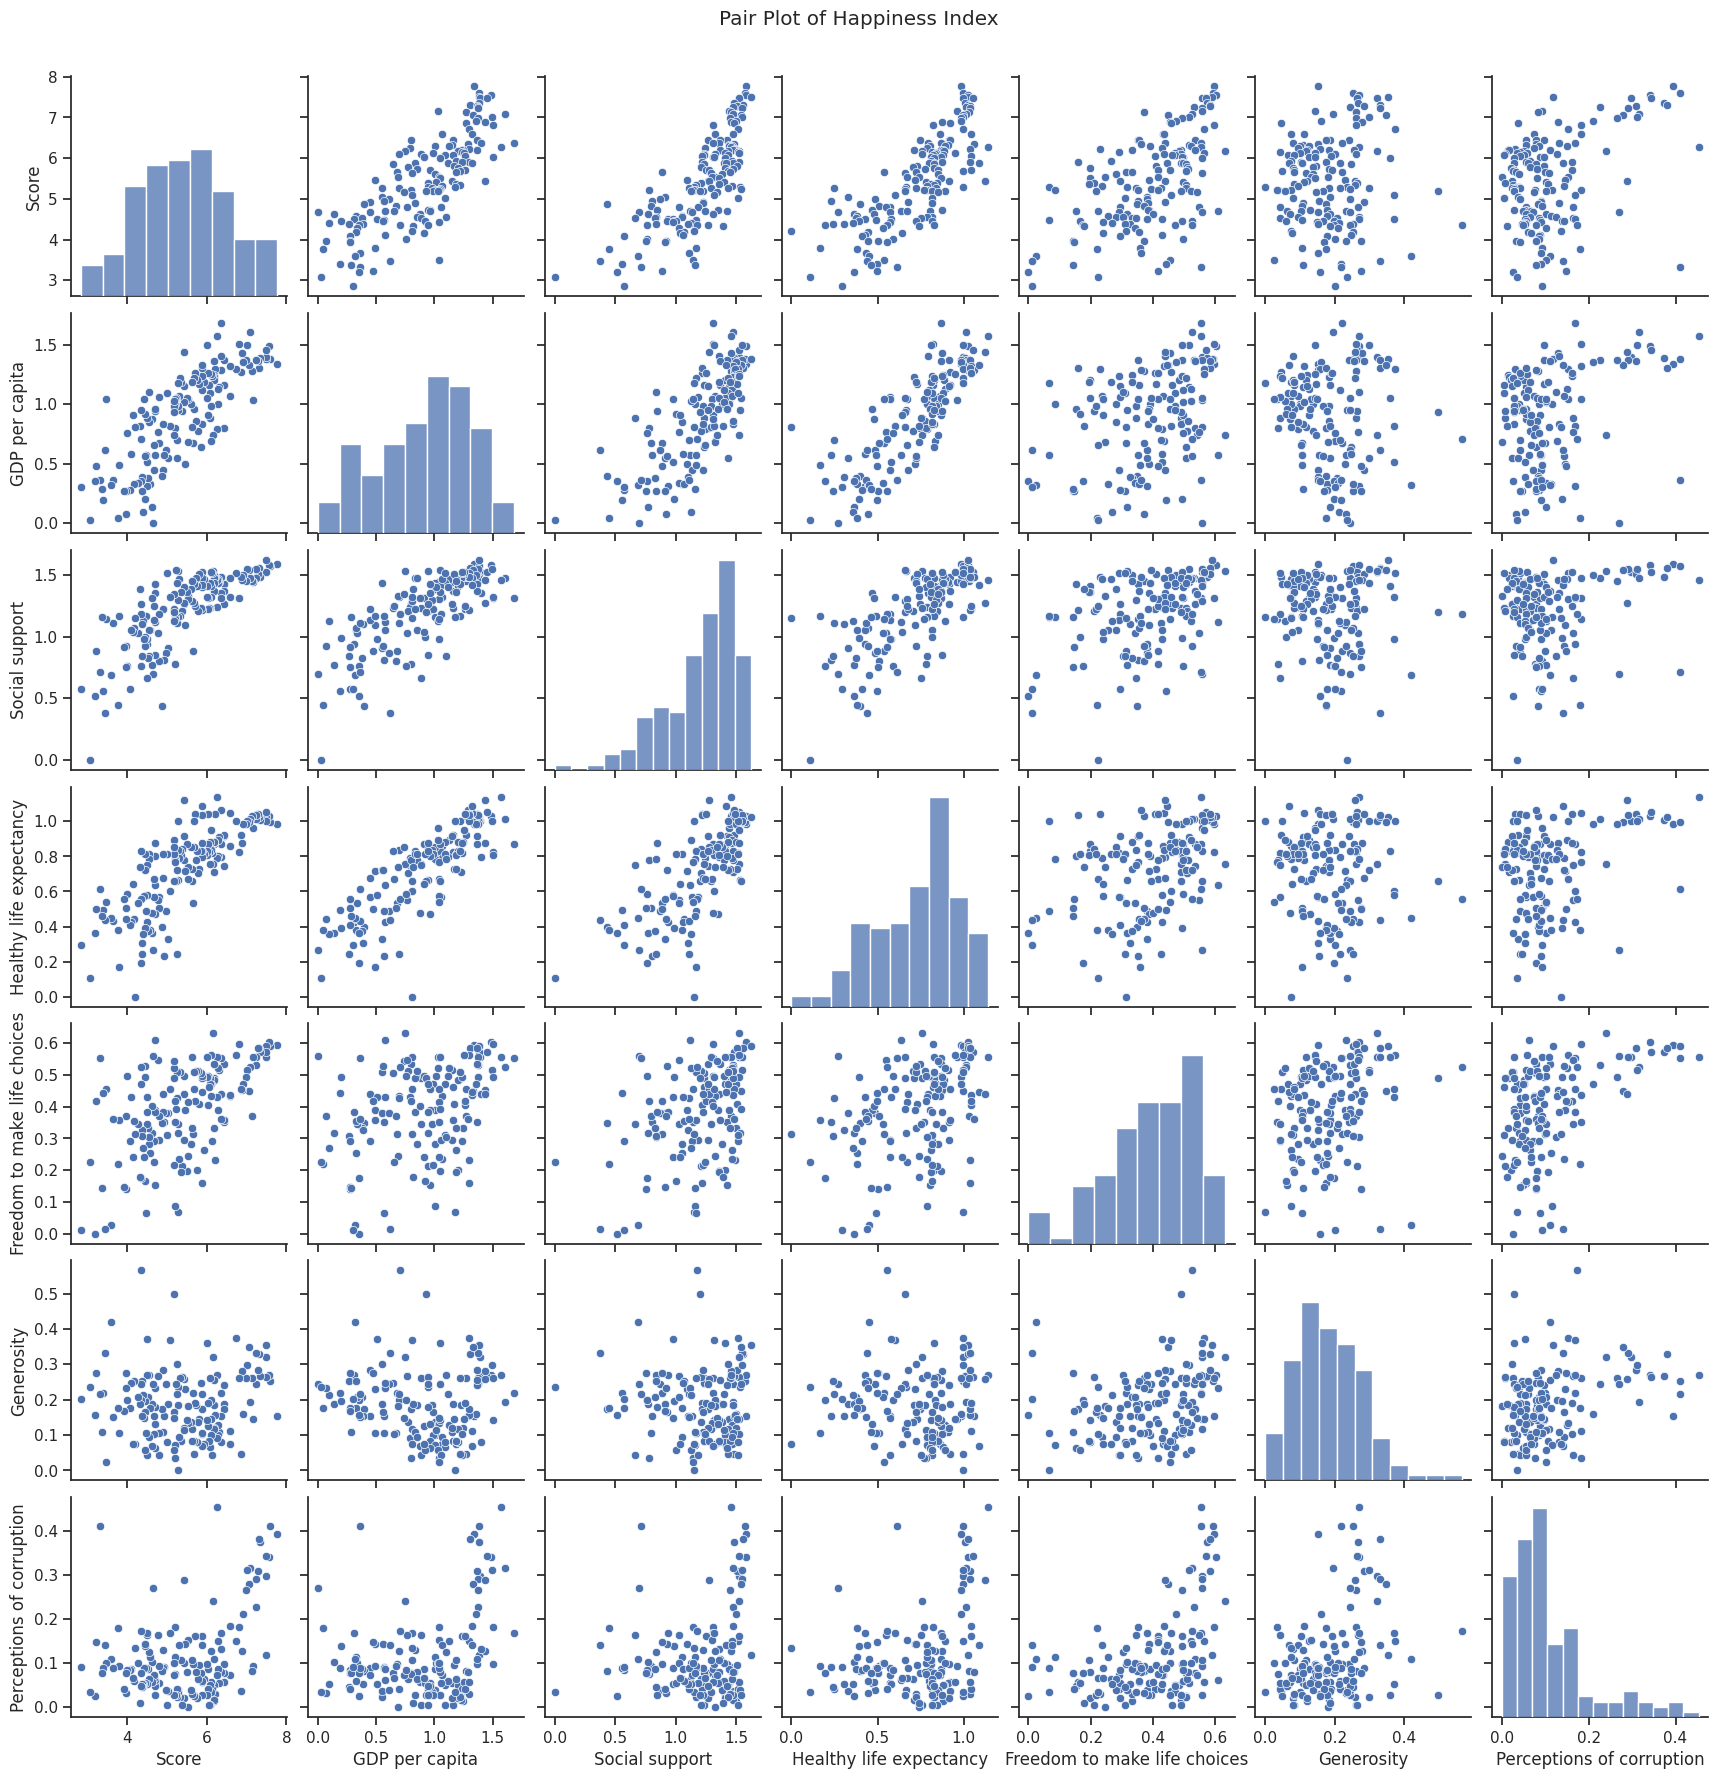

In [77]:
columns = ["Score","GDP per capita","Social support","Healthy life expectancy","Freedom to make life choices","Generosity","Perceptions of corruption"]
df1 = df[columns]

sns.set(style="ticks", color_codes=True)
pair_plot = sns.pairplot(df1)
plt.suptitle('Pair Plot of Happiness Index', y=1.02)
plt.show()

**Ploting histogram of dependent variable for checking Normality**

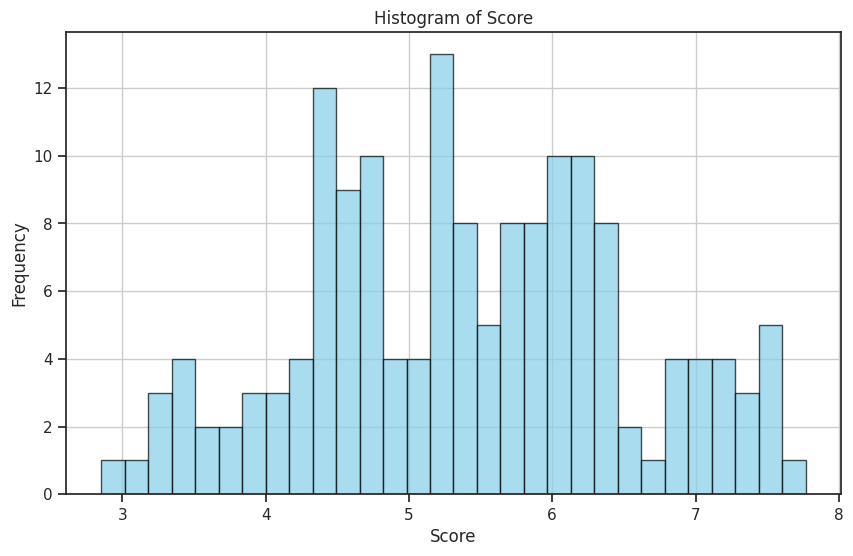

In [78]:
plt.figure(figsize=(10, 6))
plt.hist(df['Score'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Histogram of Score')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [91]:
x = df["GDP per capita"].values.reshape(-1,1)
y = df["Score"].values.reshape(-1,1)
print(x.shape)
print(y.shape)

(156, 1)
(156, 1)


**Checking and Removing Outliers**

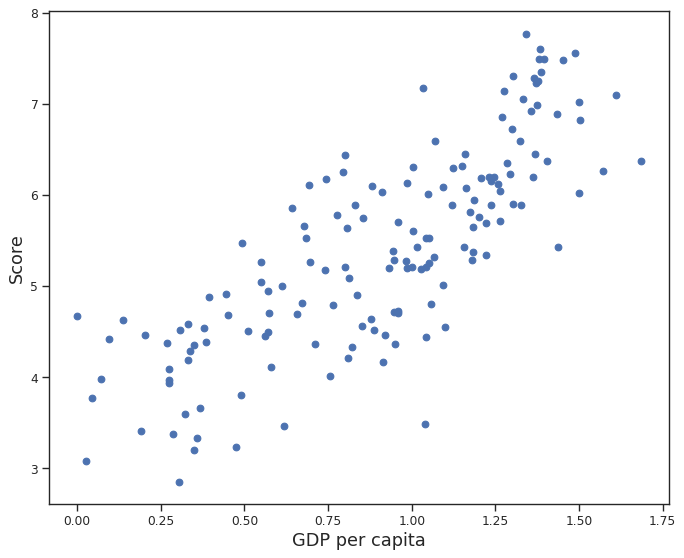

In [92]:
plt.figure(figsize=(10,8),dpi = 80)
plt.scatter(x,y)
plt.xlabel("GDP per capita",size = 16)
plt.ylabel("Score",size = 16)
plt.show()

In [94]:
mask_per_capita = (df["GDP per capita"] >= 1) & (df["GDP per capita"] <= 1.25)
mask_score = df["Score"] < 4


filtered_df = df[mask_per_capita & mask_score]


filtered_df

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
147,3.488,1.041,1.145,0.538,0.455,0.025,0.1


In [95]:
df.drop([147], axis=0, inplace=True)


In [97]:
x = df["GDP per capita"].values.reshape(-1,1)
y = df["Score"].values.reshape(-1,1)
print(x.shape)
print(y.shape)

(155, 1)
(155, 1)


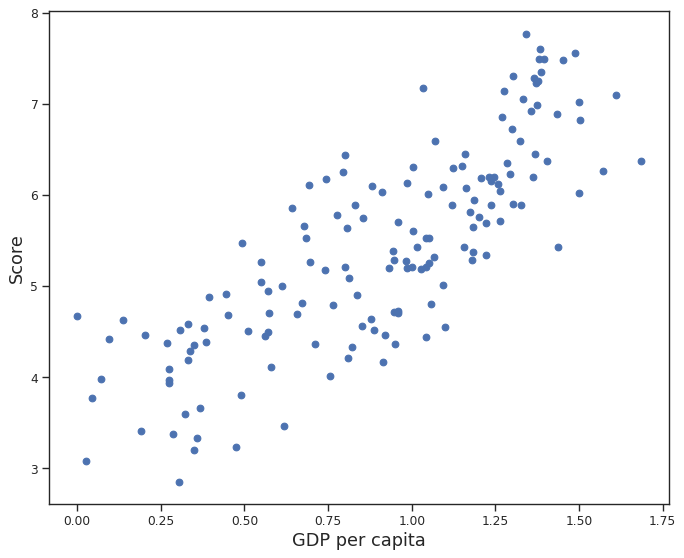

In [98]:
plt.figure(figsize=(10,8),dpi = 80)
plt.scatter(x,y)
plt.xlabel("GDP per capita",size = 16)
plt.ylabel("Score",size = 16)
plt.show()

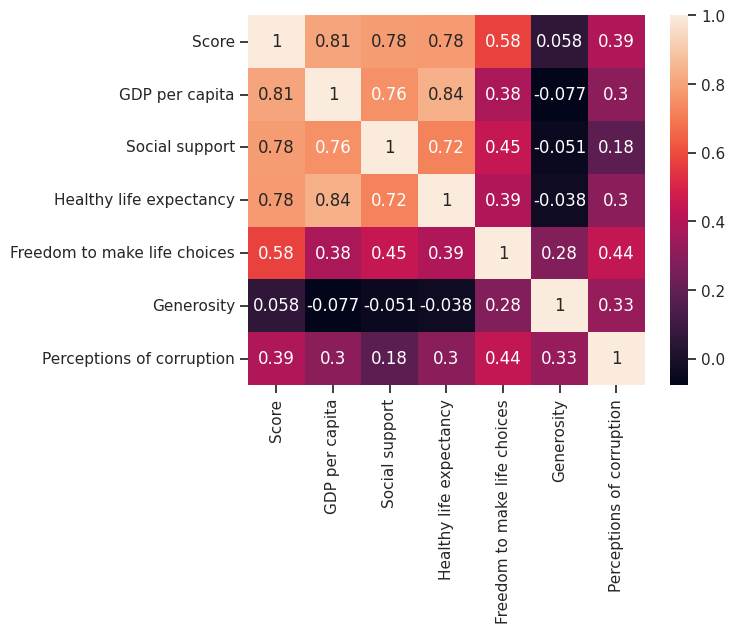

In [99]:
sns.heatmap(df.corr(),annot=True)
plt.show()

**Split Data and Train Model**

In [100]:
from sklearn.model_selection import train_test_split
x_train , x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(116, 1)
(39, 1)
(116, 1)
(39, 1)


In [101]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

**Predicting and Evaluating the model**

In [102]:
y_predict = model.predict(x_test)
y_predict.shape

(39, 1)

In [103]:
x_test = np.reshape(x_test,(x_test.shape[0]))
y_test = np.reshape(y_test,(y_test.shape[0]))
y_predict = np.reshape(y_predict,(y_predict.shape[0]))
df1 = pd.DataFrame({"X":x_test,"Actual":y_test,"Predict":y_predict})
df1

,X,Actual,Predict
0,1.181,5.287,6.030194
1,0.274,3.933,3.962403
2,1.004,6.300,5.626667
3,1.286,6.354,6.269574
4,0.886,4.519,5.357649
5,0.776,5.779,5.106870
6,0.741,5.175,5.027076
7,0.619,3.462,4.748939
8,0.026,3.083,3.397010
9,0.807,5.631,5.177544


In [104]:
y_plot = model.predict(x)

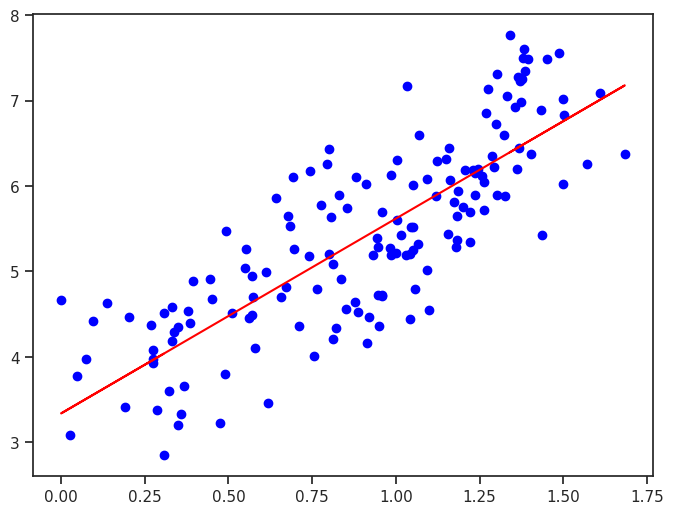

In [105]:
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='blue', label='Actual Data')
plt.plot(x, y_plot, color='red', label='Linear Regression Line')

**Model Summarry**

In [106]:
from sklearn import metrics
print("Explaind variance:", metrics.explained_variance_score(y_test,y_predict))
print("Max error:",metrics.max_error(y_test,y_predict))
print("Mean absolute error:",metrics.mean_absolute_error(y_test,y_predict))
print("Mean squared error:",metrics.mean_squared_error(y_test,y_predict,squared=True))
print("R-2 score:",metrics.r2_score(y_test,y_predict))

Explaind variance: 0.6673526148772184
Max error: 1.2869388561294595
Mean absolute error: 0.4966383874942058
Mean squared error: 0.3574432368058915
R-2 score: 0.6612603502356988


**Implementation in R**

In [2]:
install.packages("ggplot2")
install.packages("dplyr")
install.packages('tidyverse')
install.packages('caret')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘Rcpp’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’




In [3]:
library(ggplot2)
library(dplyr)
library(tidyverse)
library(caret)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.0
✔ readr     2.1.5     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift




In [4]:
Data <- read.csv("/content/sample_data/2019.csv")

In [5]:
summary(Data)

  Overall.rank    Country.or.region      Score       GDP.per.capita  
 Min.   :  1.00   Length:156         Min.   :2.853   Min.   :0.0000  
 1st Qu.: 39.75   Class :character   1st Qu.:4.545   1st Qu.:0.6028  
 Median : 78.50   Mode  :character   Median :5.380   Median :0.9600  
 Mean   : 78.50                      Mean   :5.407   Mean   :0.9051  
 3rd Qu.:117.25                      3rd Qu.:6.184   3rd Qu.:1.2325  
 Max.   :156.00                      Max.   :7.769   Max.   :1.6840  
 Social.support  Healthy.life.expectancy Freedom.to.make.life.choices
 Min.   :0.000   Min.   :0.0000          Min.   :0.0000              
 1st Qu.:1.056   1st Qu.:0.5477          1st Qu.:0.3080              
 Median :1.272   Median :0.7890          Median :0.4170              
 Mean   :1.209   Mean   :0.7252          Mean   :0.3926              
 3rd Qu.:1.452   3rd Qu.:0.8818          3rd Qu.:0.5072              
 Max.   :1.624   Max.   :1.1410          Max.   :0.6310              
   Generosity     Pe

In [8]:
df <- Data %>%
  select(Score, GDP.per.capita, Social.support, Healthy.life.expectancy,
         Freedom.to.make.life.choices, Generosity, Perceptions.of.corruption)

In [9]:
df_na <- df %>%
  summarise_all(~sum(is.na(.)))
print(df_na)

  Score GDP.per.capita Social.support Healthy.life.expectancy
1     0              0              0                       0
  Freedom.to.make.life.choices Generosity Perceptions.of.corruption
1                            0          0                         0


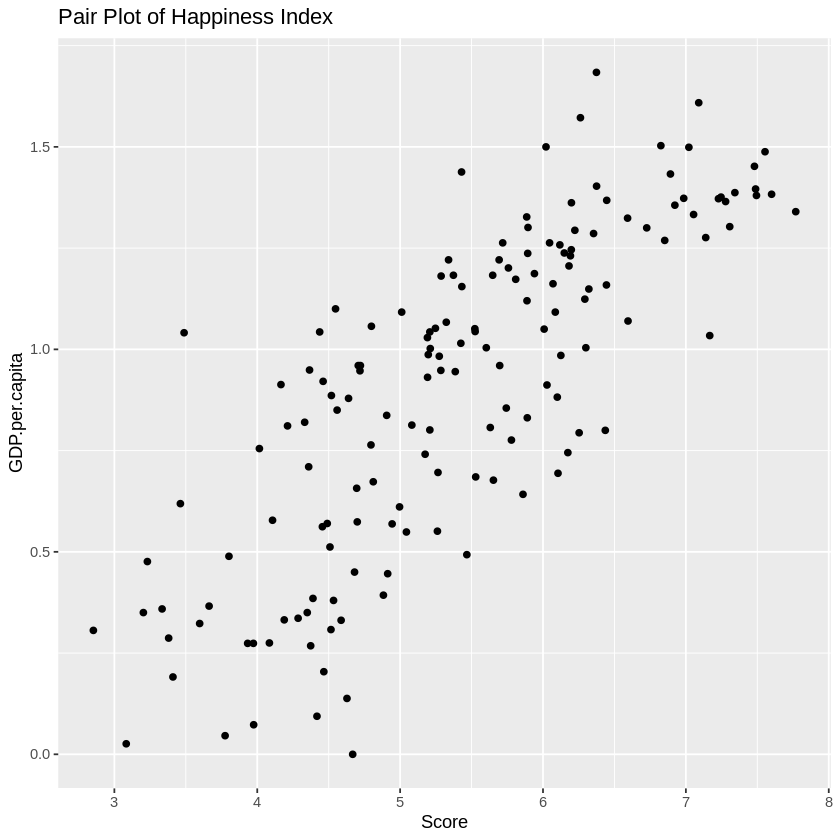

In [11]:
pair_plot <- ggplot(df, aes(x = Score, y = GDP.per.capita)) +
  geom_point() +
  labs(title = "Pair Plot of Happiness Index")
print(pair_plot)

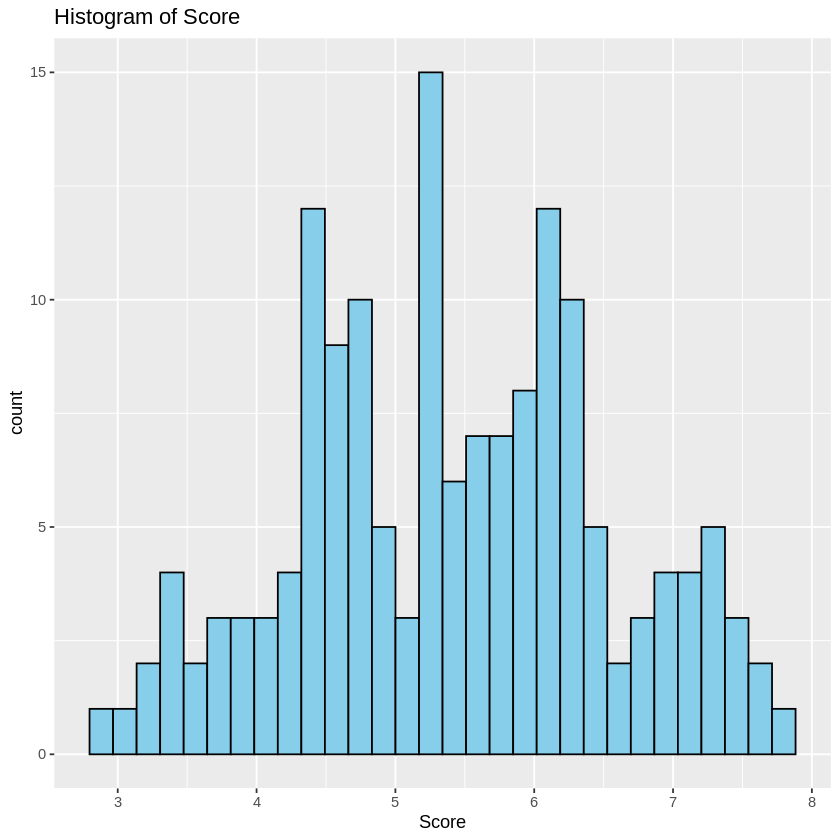

In [12]:
hist_plot <- ggplot(df, aes(x = Score)) +
  geom_histogram(color = "black", fill = "skyblue", bins = 30) +
  labs(title = "Histogram of Score")
print(hist_plot)

In [13]:
filtered_df <- df %>%
  filter(GDP.per.capita >= 1 & GDP.per.capita <= 1.25,
         Score < 4)
print(filtered_df)

  Score GDP.per.capita Social.support Healthy.life.expectancy
1 3.488          1.041          1.145                   0.538
  Freedom.to.make.life.choices Generosity Perceptions.of.corruption
1                        0.455      0.025                       0.1


In [14]:
df <- df[-147,]


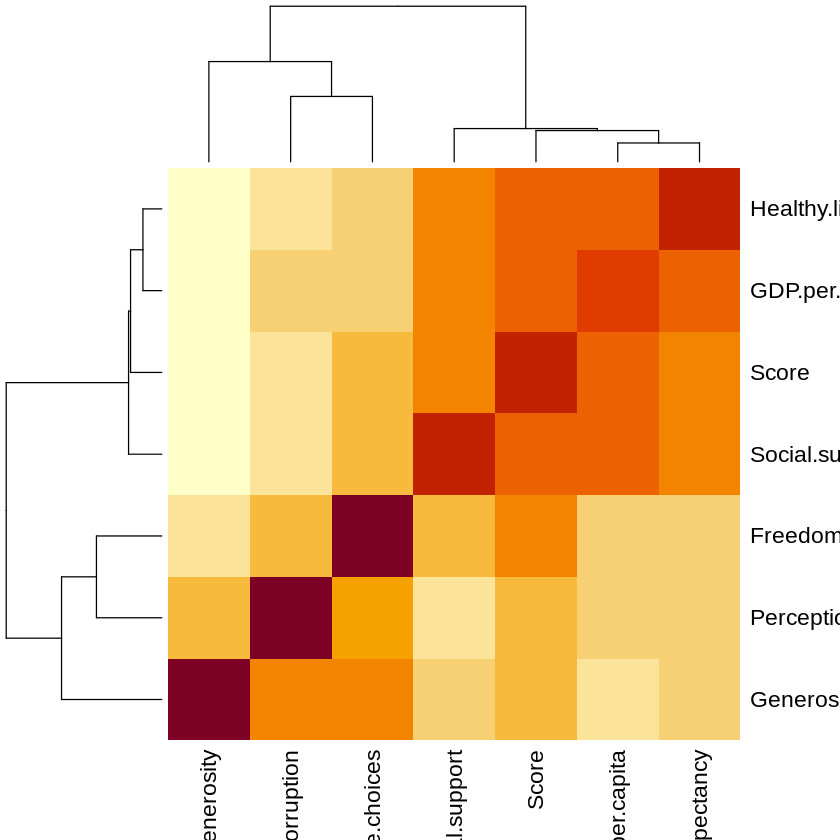

In [15]:
correlation_matrix <- cor(df)
heatmap(correlation_matrix)

In [32]:
set.seed(42)
train_index <- createDataPartition(df$Score, p = 0.75, list = FALSE)
x_train <- df[train_index, "GDP.per.capita"]
y_train <- df[train_index, "Score"]
x_test <- df[-train_index, "GDP.per.capita"]
y_test <- df[-train_index, "Score"]


In [33]:
model <- lm(Score ~ GDP.per.capita, data = df)
summary(model)


Call:
lm(formula = Score ~ GDP.per.capita, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.22213 -0.46836  0.01463  0.49441  1.47231 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)      3.4141     0.1368   24.95   <2e-16 ***
GDP.per.capita   2.2056     0.1380   15.98   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6799 on 153 degrees of freedom
Multiple R-squared:  0.6252,	Adjusted R-squared:  0.6228 
F-statistic: 255.3 on 1 and 153 DF,  p-value: < 2.2e-16


In [34]:
x_test <- data.frame(GDP.per.capita = x_test)

In [36]:
y_predict <- predict(model, newdata = x_test)

In [37]:
print(summary(model))
print(postResample(y_predict, y_test))


Call:
lm(formula = Score ~ GDP.per.capita, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.22213 -0.46836  0.01463  0.49441  1.47231 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)      3.4141     0.1368   24.95   <2e-16 ***
GDP.per.capita   2.2056     0.1380   15.98   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6799 on 153 degrees of freedom
Multiple R-squared:  0.6252,	Adjusted R-squared:  0.6228 
F-statistic: 255.3 on 1 and 153 DF,  p-value: < 2.2e-16

     RMSE  Rsquared       MAE 
0.5656722 0.7399776 0.4492524 


`geom_smooth()` using formula = 'y ~ x'


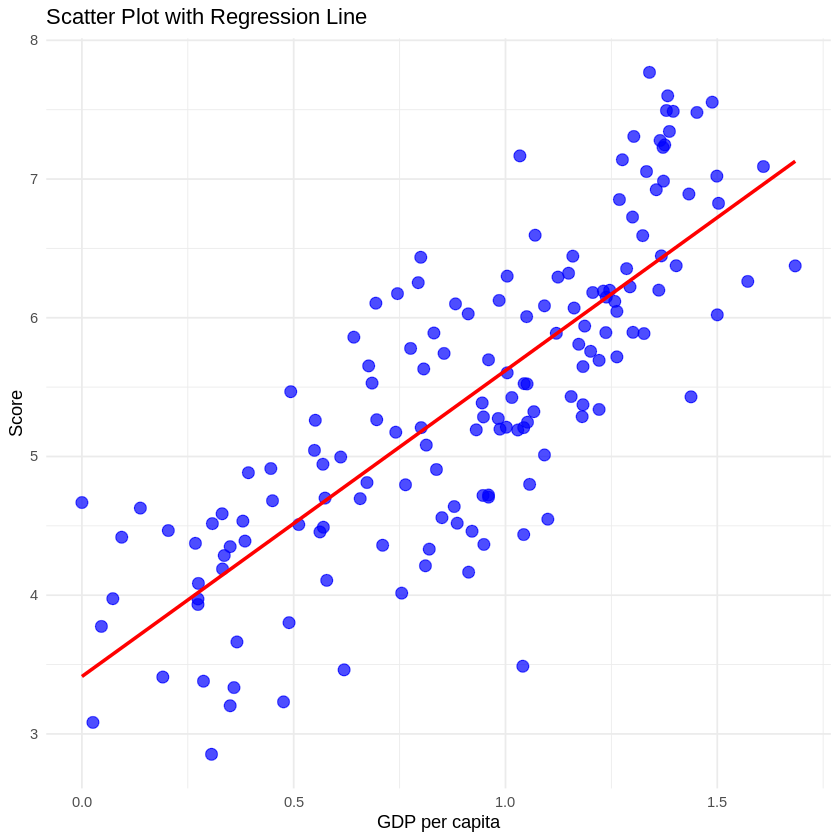

In [41]:
plot_data <- data.frame(GDP.per.capita = df$GDP.per.capita, Score = df$Score)


ggplot(plot_data, aes(x = GDP.per.capita, y = Score)) +
  geom_point(color = 'blue', alpha = 0.7, size = 3) +
  geom_smooth(method = 'lm', se = FALSE, color = 'red') +
  labs(x = 'GDP per capita', y = 'Score',
       title = 'Scatter Plot with Regression Line') +
  theme_minimal()